In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from matplotlib.pyplot import figure

In [13]:
def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

In [14]:
def normalize_grid(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [15]:
s_grid_file = open('Насыщенность', 'r')
p_grid_file = open('Пористость', 'r')
d_grid_file = open('Толщины', 'r')

In [16]:
grids = []
for grid_file in [s_grid_file, p_grid_file, d_grid_file]:
    lines = grid_file.readlines()
    for i in range (0, len(lines)):
        lines[i] = lines[i].replace('\n', '')
    
    numX = int(lines[0].split(' ')[1])
    numY = int(lines[2].split(' ')[0])
    b_lines = lines[4:]
    print('x size:', numX)
    print('y size:', numY)
    
    grid_values = np.zeros((numX, numY)) 
    x_i = 0
    y_i = 0

    for l in tqdm(b_lines):
        values = l.split(' ')
        for val in values:
            if int(float(val)) != 9999900:
                grid_values[x_i][y_i] = float(val)

            y_i += 1
            if y_i == numY:
                y_i = 0
                x_i += 1
    
    grid_values = np.fliplr(grid_values[::-1,::-1])
    grids.append(grid_values)

x size: 728
y size: 525


100%|████████████████████████████████████████████████████████████████████████| 63700/63700 [00:00<00:00, 175538.40it/s]


x size: 728
y size: 525


100%|████████████████████████████████████████████████████████████████████████| 63700/63700 [00:00<00:00, 168128.16it/s]


x size: 728
y size: 525


100%|████████████████████████████████████████████████████████████████████████| 63700/63700 [00:00<00:00, 176996.66it/s]


In [17]:
s_grid_values = grids[0]
p_grid_values = grids[1]
d_grid_values = grids[2]

print(s_grid_values.shape == p_grid_values.shape)
print(s_grid_values.shape == d_grid_values.shape)

True
True


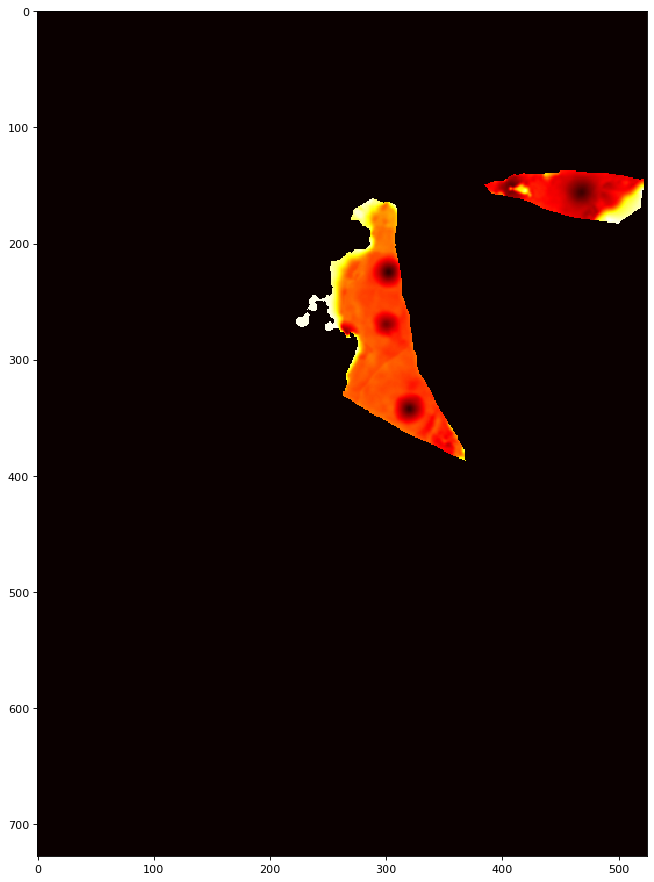

In [18]:
figure(figsize=(16, 14), dpi=80)
plt.imshow(s_grid_values, cmap='hot', interpolation='none')
plt.show()

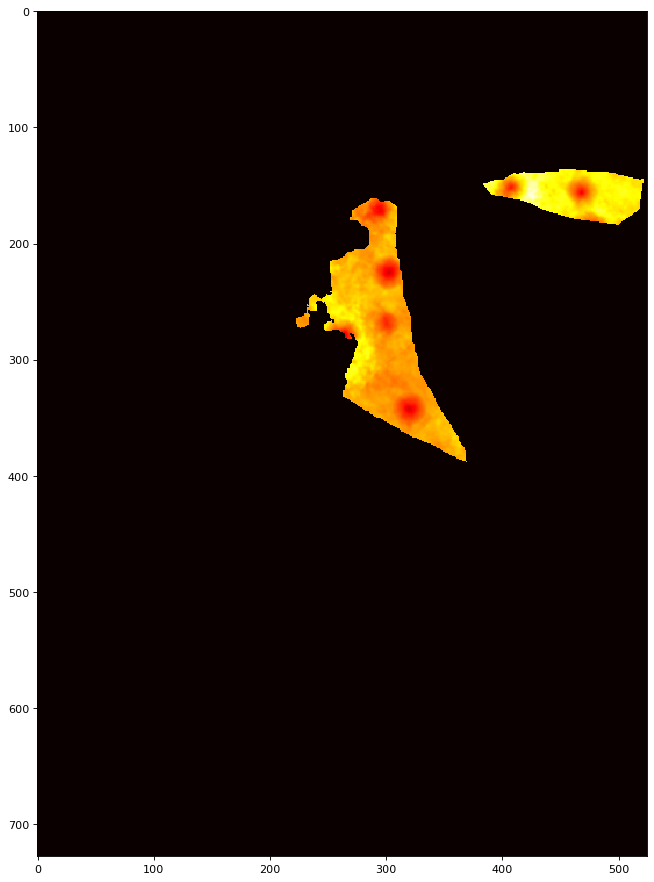

In [19]:
figure(figsize=(16, 14), dpi=80)
plt.imshow(p_grid_values, cmap='hot', interpolation='none')
plt.show()

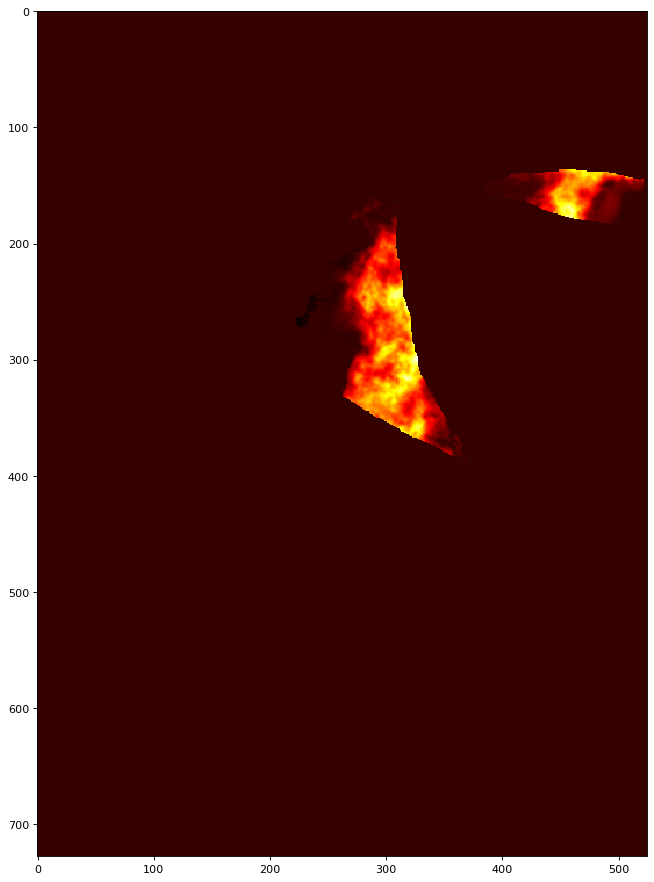

In [20]:
figure(figsize=(16, 14), dpi=80)
plt.imshow(d_grid_values, cmap='hot', interpolation='none')
plt.show()